## The word clouds printed here show the frequency of nouns, adjectives, verbs, and adverbs of that have length greater than 3 in The Beatles studio albums.

In [1]:
from albumTokens import albumTokens

#>>> graphing libraries
from os import path
import os
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

import random

#>>> language library
import nltk
#nltk.download()

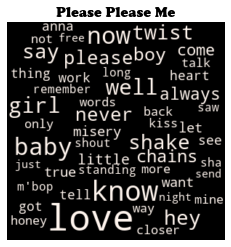

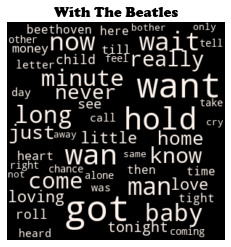

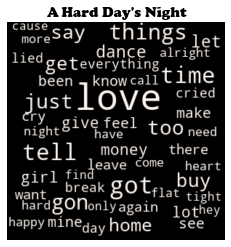

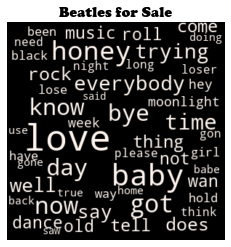

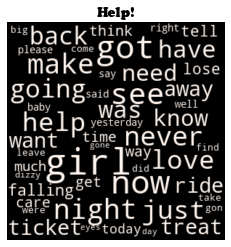

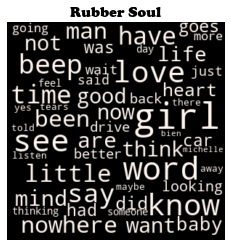

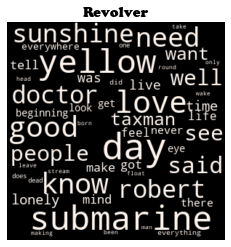

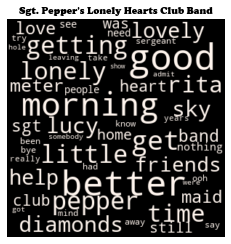

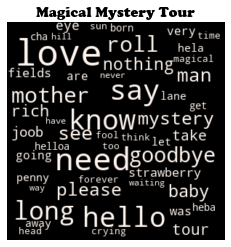

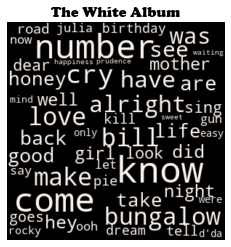

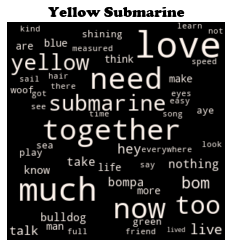

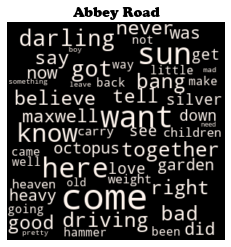

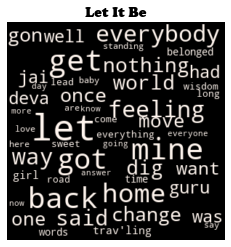

In [2]:
for album in albumTokens:
    # >>> string together tokens <<<
    text = ' '.join(albumTokens[album])
    
    # >>> select word classes to include in word cloud <<<
    tokens = nltk.word_tokenize(text) # tokens
    tagged = nltk.pos_tag(tokens) # speech tags: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
    nounTags = ['NN','NNP','NNS','NNPS'] # noun speech tags
    foreignTags = ['FW'] # foreign word tags
    adjTags = ['JJ','JJR','JJS'] # adjective tags
    verbTags = ['VB','VBD','VBG','VBN','VBP','VBZ'] # verb tags
    advTags = ['RB','RBR','RBS'] # adverb tags
    #keeperTags = nounTags+foreignTags+adjTags+verbTags+advTags
    #keeperTags = nounTags+adjTags+verbTags+advTags
    keeperTags = nounTags+adjTags+verbTags+advTags
    keepers = str()
    for elem in tagged:
        token = elem[0]
        tag = elem[1]
        if tag in keeperTags:
            keepers += '{} '.format(token)
    
    # >>> define specific words to exclude <<<
    stopSounds = {'shuop',"c'mon",'yeah','whoa','bop','oh','oooo','cos','yeh','ah',
                  'nah','la','goo','doo',"d'do"}
    # subjective and objective pronouns
    stopPronouns = {'you',"you've","you're",
                    'i',"i'm","i've","i'll","i'd",'me',
                    'he',"he's","he'll","he'd",
                    'she',"she's","she'll","she'd",
                    'they',"they're","they've","they'd",
                    'it','its',"it's","it'll",
                    'we',"we're","we've","we'll","we'd"}
    # random words to exclude
    stopRand = {"n't"}
    # the total set of words to exclude
    stopwords = stopSounds.union(stopPronouns).union(stopRand)
    
    # >>> randomly selects as selected color map (colormap=randcolour) <<<
    #randcolour = random.choice(['Wistia','cool','autumn','spring','summer'])
    
    # >>> Create Word Cloud <<<
    wc = WordCloud(background_color='black',
                   width = 300,
                   height = 300,
                   prefer_horizontal=1,
                   colormap=None,
                   color_func=lambda *args, **kwargs: "seashell",
                   font_step = 1,
                   max_words=50,
                   min_word_length=3,
                   stopwords=stopwords,
                   collocations=False,
                   max_font_size=50)
    
    #wc.generate(text) # word cloud for all tokens
    wc.generate(keepers) # word cloud for selected word classes
    
    fig, ax = plt.subplots() # create axes
    
    # title
    if album == "Sgt. Pepper's Lonely Hearts Club Band":
        title = plt.title(album, fontsize='medium', fontfamily='Cooper Black')
    else:
        title = plt.title(album, fontsize='x-large', fontfamily='Cooper Black')
        
    ax.imshow(wc, interpolation="bilinear")
    ax.set_axis_off() # hide axis labels
    plt.savefig('Word Clouds\{} Word Cloud.png'.format(album), 
                bbox_inches='tight',
                pad_inches=0.1,
                edgecolor='black',
                facecolor='antiquewhite') # save plot as image
    plt.show() # display word cloud